# **QSAR Model prediciton of unknown Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

*Modified by quantaosun@gmail.com*

# Read in data

In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/Dyrk1a_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.958607
1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.920819
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.045757
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.744727
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.920819
606,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.301030
607,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.987163
608,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.119186


In [4]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
606,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
607,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
608,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = dataset.iloc[:,-1]
Y

0      6.958607
1      6.920819
2      6.045757
3      4.744727
4      4.698970
         ...   
605    7.920819
606    8.301030
607    6.987163
608    7.119186
609    7.013228
Name: pIC50, Length: 610, dtype: float64

# Remove low variance features

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP33,PubchemFP37,PubchemFP145,PubchemFP150,PubchemFP153,PubchemFP179,PubchemFP180,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP199,PubchemFP258,PubchemFP260,PubchemFP261,PubchemFP286,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP300,PubchemFP308,PubchemFP338,PubchemFP341,PubchemFP342,PubchemFP345,PubchemFP346,PubchemFP352,PubchemFP353,PubchemFP357,PubchemFP359,PubchemFP362,PubchemFP366,PubchemFP367,PubchemFP372,PubchemFP373,...,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP685,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP714,PubchemFP716,PubchemFP728,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP742,PubchemFP746,PubchemFP757,PubchemFP758,PubchemFP761,PubchemFP767,PubchemFP777,PubchemFP779,PubchemFP791,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP809,PubchemFP820,PubchemFP821,PubchemFP824,PubchemFP830
0,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,...,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
606,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
607,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
608,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [7]:
X.to_csv('descriptor_list.csv', index = False)

In [8]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
Xlist = list(pd.read_csv('descriptor_list.csv').columns)
X[Xlist]

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP33,PubchemFP37,PubchemFP145,PubchemFP150,PubchemFP153,PubchemFP179,PubchemFP180,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP199,PubchemFP258,PubchemFP260,PubchemFP261,PubchemFP286,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP300,PubchemFP308,PubchemFP338,PubchemFP341,PubchemFP342,PubchemFP345,PubchemFP346,PubchemFP352,PubchemFP353,PubchemFP357,PubchemFP359,PubchemFP362,PubchemFP366,PubchemFP367,PubchemFP372,PubchemFP373,...,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP685,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP714,PubchemFP716,PubchemFP728,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP742,PubchemFP746,PubchemFP757,PubchemFP758,PubchemFP761,PubchemFP767,PubchemFP777,PubchemFP779,PubchemFP791,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP809,PubchemFP820,PubchemFP821,PubchemFP824,PubchemFP830
0,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,...,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
606,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
607,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
608,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Random Forest Regression Model

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8098074960736142

In [12]:
X_unknown = pd.read_csv('/content/example_smile_with_descriptors_fp.csv')
X_unknown

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The key thing now is to ensure the descriptor set is exactly the same as what we have used in builing the training set, i.e., the descriptor number and species should be all the same.

In [13]:
d_list = list(pd.read_csv('descriptor_list.csv').columns)
X_unknown[d_list]

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP33,PubchemFP37,PubchemFP145,PubchemFP150,PubchemFP153,PubchemFP179,PubchemFP180,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP199,PubchemFP258,PubchemFP260,PubchemFP261,PubchemFP286,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP300,PubchemFP308,PubchemFP338,PubchemFP341,PubchemFP342,PubchemFP345,PubchemFP346,PubchemFP352,PubchemFP353,PubchemFP357,PubchemFP359,PubchemFP362,PubchemFP366,PubchemFP367,PubchemFP372,PubchemFP373,...,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP685,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP714,PubchemFP716,PubchemFP728,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP742,PubchemFP746,PubchemFP757,PubchemFP758,PubchemFP761,PubchemFP767,PubchemFP777,PubchemFP779,PubchemFP791,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP809,PubchemFP820,PubchemFP821,PubchemFP824,PubchemFP830
0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
X_pred=X_unknown[Xlist]
X_pred

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP33,PubchemFP37,PubchemFP145,PubchemFP150,PubchemFP153,PubchemFP179,PubchemFP180,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP199,PubchemFP258,PubchemFP260,PubchemFP261,PubchemFP286,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP300,PubchemFP308,PubchemFP338,PubchemFP341,PubchemFP342,PubchemFP345,PubchemFP346,PubchemFP352,PubchemFP353,PubchemFP357,PubchemFP359,PubchemFP362,PubchemFP366,PubchemFP367,PubchemFP372,PubchemFP373,...,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP685,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP714,PubchemFP716,PubchemFP728,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP742,PubchemFP746,PubchemFP757,PubchemFP758,PubchemFP761,PubchemFP767,PubchemFP777,PubchemFP779,PubchemFP791,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP809,PubchemFP820,PubchemFP821,PubchemFP824,PubchemFP830
0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Prediction

In [15]:
Y_pred = model.predict(X)
Y_pred

array([6.73399846, 7.52206162, 6.54361988, 6.02462678, 4.78922884,
       4.78922884, 4.77381568, 4.78922884, 5.67241812, 4.82089705,
       5.64835307, 5.00915057, 6.97508576, 7.10340792, 6.23487345,
       6.50713414, 4.95687345, 4.94040228, 6.60896243, 6.39885512,
       6.45365045, 6.04778297, 7.42038114, 7.4062253 , 7.54880408,
       7.17920368, 7.54880408, 7.32364786, 6.38194068, 7.24791441,
       6.38194068, 7.2971726 , 7.16576195, 7.17920368, 7.06938704,
       7.09134962, 7.11121938, 7.09032344, 7.01383371, 7.03874653,
       6.97626714, 6.97446065, 6.9921452 , 6.86356233, 6.85646733,
       7.17920368, 6.7801806 , 6.98316245, 6.28454699, 6.38194068,
       5.15945445, 5.43830521, 5.44483592, 6.97508576, 6.71036908,
       6.20593485, 6.08940725, 6.15130629, 6.97508576, 4.97953551,
       4.97953551, 4.97953551, 5.08524837, 5.00238644, 7.47326997,
       7.47326997, 6.21949095, 6.21949095, 6.97508576, 6.97508576,
       6.14491548, 6.20648391, 6.18627369, 6.20648391, 6.29674

# Prediction for unknown smiles

In [16]:
Y_pred2 = model.predict(X_pred)
Y_pred2

array([6.6110503, 6.6110503])

## Model Performance

In [17]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.23
Coefficient of determination (R^2): 0.81


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

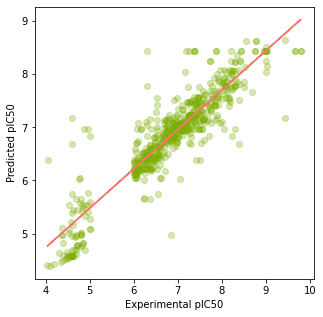

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')